# 캔들차트 데이터 생성


참고 : https://dataplay.tistory.com/37?category=845492

참고코드 : https://colab.research.google.com/drive/1WXG3cohwO6_0mbmB9CdT37cc1jfE2Zon

In [ ]:
!pip install mpl_finance
!pip install -U finance_datareader

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import FinanceDataReader as fdr

from shutil import copyfile, move
from mpl_finance import candlestick2_ochl

도지 코인 파일 불러오기


In [ ]:
data =  fdr.DataReader("KS11", '1999-01-01', '2019-12-30')

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,Close,Open,High,Low,Volume,Change
0,587.57,565.10,600.45,565.10,198370000.0,0.0446
1,598.55,588.32,599.90,585.71,252580000.0,0.0187
2,612.36,600.14,612.38,596.55,260320000.0,0.0231
3,637.59,615.24,638.41,615.24,299020000.0,0.0412
4,626.33,637.24,642.54,625.56,292230000.0,-0.0177
...,...,...,...,...,...,...
5181,2203.71,2208.22,2209.20,2196.43,502030000.0,-0.0002
5182,2190.08,2206.23,2206.23,2187.58,569970000.0,-0.0062
5183,2197.93,2192.22,2198.01,2183.90,571310000.0,0.0036
5184,2204.21,2183.70,2215.55,2177.40,490170000.0,0.0029


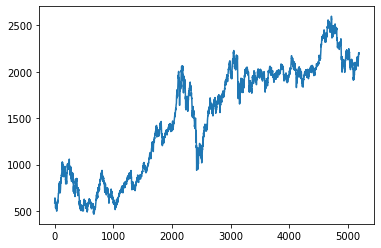

In [ ]:
plt.plot(data['Close'])

In [ ]:
def ohlc2cs2(data, seq_len, dimension):
    # python preprocess.py -m ohlc2cs -l 20 -i stockdatas/EWT_testing.csv -t testing
    print("Converting olhc to candlestick")
    df = data
    plt.style.use('dark_background')
    figs = np.zeros((len(df)-1, dimension, dimension, 3))
    labels = []
    for i in range(0, len(df)-1):
        # ohlc+volume
        c = df.loc[i:i + int(seq_len) - 1, :]
        c_ = df.loc[i:i + int(seq_len), :]
        if len(c) == int(seq_len):
            my_dpi = 96
            fig = plt.figure(figsize=(dimension / my_dpi,
                                      dimension / my_dpi), dpi=my_dpi)
            ax1 = fig.add_subplot(1, 1, 1)
            candlestick2_ochl(ax1, c['Open'], c['Close'], c['High'],
                              c['Low'], width=1,
                              colorup='#77d879', colordown='#db3f3f')
            ax1.grid(False)
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.xaxis.set_visible(False)
            ax1.yaxis.set_visible(False)
            ax1.axis('off')

            # create the second axis for the volume bar-plot
            # Add a seconds axis for the volume overlay

        starting = c_["Close"].iloc[-2]
        endvalue = c_["Close"].iloc[-1]
        if endvalue > starting :
            label = 1
        else :
            label = 0
        labels.append(label)

        fig.canvas.draw()
        fig_np = np.array(fig.canvas.renderer._renderer)
        figs[i] = fig_np[:,:,:3]

        plt.close(fig)
        # normal length - end

    print("Converting olhc to candlestik finished.")
    return figs, labels

In [ ]:
inputs = data
seq_len = 30
dimension = 48

figures, labels = ohlc2cs2(inputs, seq_len, dimension)

Converting olhc to candlestick
Converting olhc to candlestik finished.


In [ ]:
#위 함수로 생성된 figures는 값의 범위가 0~255 이기 때문에 0~1로 맞춰주기 위해 255로 나눕니다.
figures = figures/255.0
print(np.shape(labels), np.shape(figures))

(5185,) (5185, 48, 48, 3)


데이터 제너레이팅

In [ ]:
def single_stock_generator(chart, labels, batch_size) :
    #output [chart, labels]
    while True :
        stock_batch = np.zeros(shape=(batch_size, dimension, dimension, 3))
        label_batch = np.zeros(shape=(batch_size, ))
        for i in range(batch_size) :
            idx = np.random.randint(len(labels))
            stock_batch[i] = chart[idx]
            label_batch[i] = labels[idx]

        yield stock_batch, label_batch

In [ ]:
train_len = 3474
batch_size = 16
train_gen = single_stock_generator(figures[:train_len], labels[:train_len], batch_size)
test_gen = single_stock_generator(figures[train_len:], labels[train_len:], batch_size)


In [ ]:
tmp_data = next(train_gen)
print("Chart image shape : ",np.shape(tmp_data[0]))
print("Label shape :",np.shape(tmp_data[1]))

Chart image shape :  (16, 48, 48, 3)
Label shape : (16,)


In [ ]:
# 만들어진 차트 이미지 중 하나를 예시로 그려보겠습니다.
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
len(tmp_data[0][0][:,:,:])

48

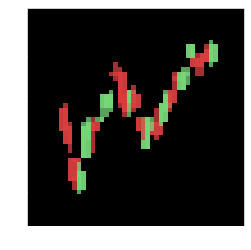

In [ ]:
plt.figure()
plt.imshow(tmp_data[0][15][:,:,:])
plt.show()

# 모듈, 라이브러리 설치

In [ ]:
# Keras의 Functional APi를 이용할 거라서 불러와줍니다.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas import get_dummies
import xgboost as xgb
import scipy
import math
import json
import sys
import csv
import os
import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook



# ANN


In [ ]:
x_batch = next(train_gen)

In [ ]:
np.shape(x_batch[0])

(16, 48, 48, 3)

참고 코드 : https://colab.research.google.com/drive/1rIylR9RWEckndbyFNx1Wl_yUQZUF-wyI#scrollTo=70zNPAmbZcGh

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

ANN = keras.Model(inputs, outputs)
ANN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6912)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                221216    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 221,249
Trainable params: 221,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4

for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = ANN(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= ANN(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

ANN_loss = float(format(val_loss_avg.result()))
ANN_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.70286 , Train acc: 0.48526
Val_Loss: 0.700, Val_acc: 0.482
Epoch 001: , Train Loss: 0.70347 , Train acc: 0.48046
Val_Loss: 0.703, Val_acc: 0.478
Epoch 002: , Train Loss: 0.70703 , Train acc: 0.47468
Val_Loss: 0.701, Val_acc: 0.473
Epoch 003: , Train Loss: 0.70056 , Train acc: 0.47591
Val_Loss: 0.703, Val_acc: 0.477
Epoch 004: , Train Loss: 0.70757 , Train acc: 0.47558
Val_Loss: 0.706, Val_acc: 0.475
Epoch 005: , Train Loss: 0.70687 , Train acc: 0.47293
Val_Loss: 0.698, Val_acc: 0.473
Epoch 006: , Train Loss: 0.70442 , Train acc: 0.47296
Val_Loss: 0.689, Val_acc: 0.474
Epoch 007: , Train Loss: 0.70209 , Train acc: 0.47476
Val_Loss: 0.701, Val_acc: 0.475
Epoch 008: , Train Loss: 0.70532 , Train acc: 0.47593
Val_Loss: 0.698, Val_acc: 0.476
Epoch 009: , Train Loss: 0.70565 , Train acc: 0.47552
Val_Loss: 0.700, Val_acc: 0.476
Epoch 010: , Train Loss: 0.70377 , Train acc: 0.47601
Val_Loss: 0.698, Val_acc: 0.476


In [ ]:
ANN_ACC

0.4762704074382782

# 1D CNN

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal",activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

CNN1D = keras.Model(inputs, outputs)
CNN1D.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 48, 32)        512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1179664   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,180,193
Trainable params: 1,180,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = CNN1D(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= CNN1D(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN1D_loss = float(format(val_loss_avg.result()))
CNN1D_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69208 , Train acc: 0.52743
Val_Loss: 0.692, Val_acc: 0.528
Epoch 001: , Train Loss: 0.68790 , Train acc: 0.53468
Val_Loss: 0.696, Val_acc: 0.538
Epoch 002: , Train Loss: 0.69110 , Train acc: 0.53752
Val_Loss: 0.691, Val_acc: 0.537
Epoch 003: , Train Loss: 0.69237 , Train acc: 0.53463
Val_Loss: 0.696, Val_acc: 0.533
Epoch 004: , Train Loss: 0.68949 , Train acc: 0.53331
Val_Loss: 0.692, Val_acc: 0.535
Epoch 005: , Train Loss: 0.69189 , Train acc: 0.53491
Val_Loss: 0.696, Val_acc: 0.534
Epoch 006: , Train Loss: 0.69129 , Train acc: 0.53317
Val_Loss: 0.691, Val_acc: 0.533
Epoch 007: , Train Loss: 0.69117 , Train acc: 0.53418
Val_Loss: 0.695, Val_acc: 0.534
Epoch 008: , Train Loss: 0.68972 , Train acc: 0.53417
Val_Loss: 0.691, Val_acc: 0.535
Epoch 009: , Train Loss: 0.68858 , Train acc: 0.53597
Val_Loss: 0.697, Val_acc: 0.536
Epoch 010: , Train Loss: 0.69204 , Train acc: 0.53551
Val_Loss: 0.689, Val_acc: 0.535


In [ ]:
CNN1D_ACC

0.535446286201477

# CNN

참고 논문 : Using Deep Learning Neural Networks and Candlestick chart Representation to Predict Stock Market
https://arxiv.org/pdf/1903.12258.pdf

다음날 종가가 상승이냐 아니냐를 맞추는 binary classification 문제

In [ ]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
x = layers.Conv2D(48, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Conv2D(96, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

CNN = keras.Model(inputs, outputs)
CNN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 96)        41568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 96)        0   

In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        y_batch = y_batch.reshape(-1,1)
        y_ = CNN(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        y_batch = y_batch.reshape(-1,1)
        y_= CNN(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_loss = float(format(val_loss_avg.result()))
CNN_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69803 , Train acc: 0.45094
Val_Loss: 0.696, Val_acc: 0.454
Epoch 001: , Train Loss: 0.69831 , Train acc: 0.45888
Val_Loss: 0.697, Val_acc: 0.457
Epoch 002: , Train Loss: 0.69791 , Train acc: 0.45720
Val_Loss: 0.696, Val_acc: 0.457
Epoch 003: , Train Loss: 0.69803 , Train acc: 0.45883
Val_Loss: 0.695, Val_acc: 0.458
Epoch 004: , Train Loss: 0.69550 , Train acc: 0.46148
Val_Loss: 0.697, Val_acc: 0.463
Epoch 005: , Train Loss: 0.69663 , Train acc: 0.46415
Val_Loss: 0.696, Val_acc: 0.465
Epoch 006: , Train Loss: 0.69731 , Train acc: 0.46516
Val_Loss: 0.695, Val_acc: 0.465
Epoch 007: , Train Loss: 0.69693 , Train acc: 0.46630
Val_Loss: 0.697, Val_acc: 0.467
Epoch 008: , Train Loss: 0.69687 , Train acc: 0.46667
Val_Loss: 0.695, Val_acc: 0.468
Epoch 009: , Train Loss: 0.69750 , Train acc: 0.46739
Val_Loss: 0.696, Val_acc: 0.467
Epoch 010: , Train Loss: 0.69772 , Train acc: 0.46755
Val_Loss: 0.697, Val_acc: 0.467


# GRU


소스코드 : https://github.com/zutshianand/Stock-Price-Prediction/blob/master/main.ipynb

In [ ]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(2304, 3), activation='tanh'))
# The output layer
regressorGRU.add(Dense(units=1))
regressorGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 2304, 50)          8250      
_________________________________________________________________
dense_5 (Dense)              (None, 2304, 1)           51        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = np.random.rand(16, 48, 48, 3)

        x_batch = x_batch.reshape(16, 2304, 3)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= regressorGRU(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

GRU_loss = float(format(val_loss_avg.result()))
GRU_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.68942 , Train acc: 0.46716
Val_Loss: 6.869, Val_acc: 0.533
Epoch 001: , Train Loss: 9.30713 , Train acc: 0.49190
Val_Loss: 7.086, Val_acc: 0.485
Epoch 002: , Train Loss: 7.58597 , Train acc: 0.48380
Val_Loss: 6.948, Val_acc: 0.485
Epoch 003: , Train Loss: 6.76436 , Train acc: 0.48457
Val_Loss: 7.037, Val_acc: 0.484
Epoch 004: , Train Loss: 7.62096 , Train acc: 0.48322
Val_Loss: 7.246, Val_acc: 0.478
Epoch 005: , Train Loss: 7.61633 , Train acc: 0.47940
Val_Loss: 6.870, Val_acc: 0.479
Epoch 006: , Train Loss: 5.06238 , Train acc: 0.48148
Val_Loss: 6.929, Val_acc: 0.482
Epoch 007: , Train Loss: 6.76091 , Train acc: 0.48231
Val_Loss: 6.869, Val_acc: 0.483
Epoch 008: , Train Loss: 7.60641 , Train acc: 0.48351
Val_Loss: 7.230, Val_acc: 0.483
Epoch 009: , Train Loss: 8.45957 , Train acc: 0.48148
Val_Loss: 6.995, Val_acc: 0.480
Epoch 010: , Train Loss: 9.26956 , Train acc: 0.48160
Val_Loss: 6.636, Val_acc: 0.483


In [ ]:
GRU_ACC

0.4829646646976471

# LSTM

ValueError: ignored

In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = LSTM(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg.update_state(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= LSTM(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value2 = acc_fn(y_batch, y_)
        val_loss_avg.update_state(loss_value2)
        val_acc_avg(acc_value2)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

LSTM_loss = float(format(val_loss_avg.result()))
LSTM_ACC = float(format(val_acc_avg.result()))

ValueError: ignored

In [ ]:
LSTM_ACC

0.4671262204647064

# BLSTM

소스코드 : https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

In [ ]:
BL = Sequential()
BL.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(2304, 3)))
BL.add(TimeDistributed(Dense(1, activation='sigmoid')))
BL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 2304, 40)          3840      
_________________________________________________________________
time_distributed (TimeDistri (None, 2304, 1)           41        
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = BL(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= BL(x_batch)
        loss_value2 = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value2)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

BLSTM_loss = float(format(val_loss_avg.result()))
BLSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.70784 , Train acc: 0.52797
Val_Loss: 0.714, Val_acc: 0.522
Epoch 001: , Train Loss: 0.70021 , Train acc: 0.52683
Val_Loss: 0.705, Val_acc: 0.528
Epoch 002: , Train Loss: 0.70008 , Train acc: 0.53098
Val_Loss: 0.716, Val_acc: 0.531
Epoch 003: , Train Loss: 0.69779 , Train acc: 0.53022
Val_Loss: 0.713, Val_acc: 0.532
Epoch 004: , Train Loss: 0.70263 , Train acc: 0.53247
Val_Loss: 0.710, Val_acc: 0.532
Epoch 005: , Train Loss: 0.70796 , Train acc: 0.53106
Val_Loss: 0.696, Val_acc: 0.531
Epoch 006: , Train Loss: 0.69614 , Train acc: 0.53166
Val_Loss: 0.724, Val_acc: 0.532
Epoch 007: , Train Loss: 0.69932 , Train acc: 0.53257
Val_Loss: 0.711, Val_acc: 0.533
Epoch 008: , Train Loss: 0.70263 , Train acc: 0.53227
Val_Loss: 0.708, Val_acc: 0.532
Epoch 009: , Train Loss: 0.70468 , Train acc: 0.53157
Val_Loss: 0.722, Val_acc: 0.531
Epoch 010: , Train Loss: 0.69728 , Train acc: 0.53172
Val_Loss: 0.704, Val_acc: 0.532


In [ ]:
BLSTM_ACC

0.5322005748748779

# Convlstm2D

참고 : https://deep-deep-deep.tistory.com/32 [딥딥딥]

소스 코드 : https://keras.io/examples/vision/conv_lstm/

CNN 관련 : http://taewan.kim/post/cnn/

In [ ]:
seq = keras.Sequential(
    [
        keras.Input(
            shape=(48, 48, 3, 1)
        ),  # Variable-length sequence of 40x40x1 frames
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True

        ),
        layers.BatchNormalization(),
        layers.Conv3D(
            filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
        ),
    ]
)
seq.compile(loss="binary_crossentropy", optimizer="adadelta")

In [ ]:
seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 48, 48, 3, 40)     59200     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 3, 40)     160       
_________________________________________________________________
conv3d (Conv3D)              (None, 48, 48, 3, 1)      1081      
Total params: 60,441
Trainable params: 60,361
Non-trainable params: 80
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = x_batch.reshape(16, 48, 48, 3, 1)
        y_ = seq(x_batch)[0]
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = x_batch.reshape(16, 48, 48, 3, 1)
        y_= seq(x_batch)[0]
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

Convlstm2D_loss = float(format(val_loss_avg.result()))
Convlstm2D_acc = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69307 , Train acc: 0.49574
Val_Loss: 0.693, Val_acc: 0.493
Epoch 001: , Train Loss: 0.69307 , Train acc: 0.49370
Val_Loss: 0.693, Val_acc: 0.494
Epoch 002: , Train Loss: 0.69306 , Train acc: 0.49427
Val_Loss: 0.693, Val_acc: 0.494
Epoch 003: , Train Loss: 0.69306 , Train acc: 0.49418
Val_Loss: 0.693, Val_acc: 0.494
Epoch 004: , Train Loss: 0.69302 , Train acc: 0.49404
Val_Loss: 0.693, Val_acc: 0.494
Epoch 005: , Train Loss: 0.69302 , Train acc: 0.49415
Val_Loss: 0.693, Val_acc: 0.494
Epoch 006: , Train Loss: 0.69304 , Train acc: 0.49368
Val_Loss: 0.693, Val_acc: 0.494
Epoch 007: , Train Loss: 0.69301 , Train acc: 0.49342
Val_Loss: 0.693, Val_acc: 0.493
Epoch 008: , Train Loss: 0.69305 , Train acc: 0.49309
Val_Loss: 0.693, Val_acc: 0.493
Epoch 009: , Train Loss: 0.69302 , Train acc: 0.49306
Val_Loss: 0.693, Val_acc: 0.493
Epoch 010: , Train Loss: 0.69304 , Train acc: 0.49313
Val_Loss: 0.693, Val_acc: 0.493


In [ ]:
Convlstm2D_acc

0.49307361245155334

 # CNN-LSTM

소스 코드 : https://colab.research.google.com/drive/1rIylR9RWEckndbyFNx1Wl_yUQZUF-wyI#scrollTo=M1QKFdJOYTjx

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, ConvLSTM2D, Flatten
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
inputs = keras.Input(shape=(2304, 3))
x = inputs
# 1차원 feature map 생성
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal", activation="relu")(x)
# LSTM
x = layers.LSTM(16, activation='tanh')(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x

M10 = keras.Model(inputs, outputs)
M10.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2304, 3)]         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2304, 32)          512       
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = M10(x_batch)
        y_batch = y_batch.reshape(-1,1)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= M10(x_batch)
        y_batch = y_batch.reshape(-1,1)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_LSTM_loss = float(format(val_loss_avg.result()))
CNN_LSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69513 , Train acc: 0.46967
Val_Loss: 0.696, Val_acc: 0.463
Epoch 001: , Train Loss: 0.69509 , Train acc: 0.45950
Val_Loss: 0.693, Val_acc: 0.462
Epoch 002: , Train Loss: 0.69521 , Train acc: 0.46435
Val_Loss: 0.694, Val_acc: 0.464
Epoch 003: , Train Loss: 0.69550 , Train acc: 0.46168
Val_Loss: 0.694, Val_acc: 0.462
Epoch 004: , Train Loss: 0.69507 , Train acc: 0.46223
Val_Loss: 0.692, Val_acc: 0.463
Epoch 005: , Train Loss: 0.69489 , Train acc: 0.46471
Val_Loss: 0.694, Val_acc: 0.465
Epoch 006: , Train Loss: 0.69541 , Train acc: 0.46420
Val_Loss: 0.695, Val_acc: 0.463
Epoch 007: , Train Loss: 0.69510 , Train acc: 0.46281
Val_Loss: 0.694, Val_acc: 0.463
Epoch 008: , Train Loss: 0.69522 , Train acc: 0.46323
Val_Loss: 0.695, Val_acc: 0.463
Epoch 009: , Train Loss: 0.69470 , Train acc: 0.46352
Val_Loss: 0.693, Val_acc: 0.464
Epoch 010: , Train Loss: 0.69465 , Train acc: 0.46464
Val_Loss: 0.695, Val_acc: 0.465


In [ ]:
CNN_LSTM_ACC

0.4651229679584503

# CNN-BLSTM

In [ ]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:
inputs = keras.Input(shape=(2304, 3))
x = inputs
# 1차원 feature map 생성
x = layers.Conv1D(filters=32, kernel_size=5, padding="causal", activation="relu")(x)
# LSTM
x = layers.Bidirectional(LSTM(20, return_sequences=True))(x)
x = layers.TimeDistributed(Dense(1, activation='sigmoid'))(x)
outputs = x

M11 = keras.Model(inputs, outputs)
M11.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2304, 3)]         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2304, 32)          512       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2304, 40)          8480      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2304, 1)           41        
Total params: 9,033
Trainable params: 9,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#정확도
num_iters = train_len // batch_size
num_epochs = 11
optimizer = tf.keras.optimizers.Adam(0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
acc_fn = tf.keras.metrics.BinaryAccuracy()
num_test_iters = num_iters // 4
for epoch in range(num_epochs) :
    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()
    epoch_acc_avg = tf.keras.metrics.Mean()
    val_acc_avg = tf.keras.metrics.Mean()

    for iter in range(num_iters) :
        x_batch, y_batch = next(train_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_ = M11(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        epoch_loss_avg(loss_value)
        epoch_acc_avg(acc_value)

    for iter in range(num_test_iters) :
        x_batch, y_batch = next(test_gen)
        x_batch = np.random.rand(16, 48, 48, 3)
        x_batch = x_batch.reshape(16, 2304, 3)
        y_= M11(x_batch)
        loss_value = loss_fn(y_batch, y_)
        acc_value = acc_fn(y_batch, y_)
        val_loss_avg(loss_value)
        val_acc_avg(acc_value)



    print("Epoch {:03d}: , Train Loss: {:.5f} , Train acc: {:.5f}".format(epoch, epoch_loss_avg.result(), epoch_acc_avg.result()))
    print("Val_Loss: {:.3f}, Val_acc: {:.3f}".format(val_loss_avg.result(), val_acc_avg.result()))

CNN_BLSTM_loss = float(format(val_loss_avg.result()))
CNN_BLSTM_ACC = float(format(val_acc_avg.result()))

Epoch 000: , Train Loss: 0.69048 , Train acc: 0.54495
Val_Loss: 0.693, Val_acc: 0.544
Epoch 001: , Train Loss: 0.69076 , Train acc: 0.54159
Val_Loss: 0.693, Val_acc: 0.540
Epoch 002: , Train Loss: 0.69027 , Train acc: 0.53937
Val_Loss: 0.694, Val_acc: 0.539
Epoch 003: , Train Loss: 0.69078 , Train acc: 0.53825
Val_Loss: 0.692, Val_acc: 0.538
Epoch 004: , Train Loss: 0.68999 , Train acc: 0.53890
Val_Loss: 0.691, Val_acc: 0.540
Epoch 005: , Train Loss: 0.69083 , Train acc: 0.53966
Val_Loss: 0.691, Val_acc: 0.540
Epoch 006: , Train Loss: 0.69263 , Train acc: 0.53787
Val_Loss: 0.693, Val_acc: 0.537
Epoch 007: , Train Loss: 0.69096 , Train acc: 0.53643
Val_Loss: 0.693, Val_acc: 0.536
Epoch 008: , Train Loss: 0.69062 , Train acc: 0.53653
Val_Loss: 0.694, Val_acc: 0.537
Epoch 009: , Train Loss: 0.69102 , Train acc: 0.53593
Val_Loss: 0.694, Val_acc: 0.536
Epoch 010: , Train Loss: 0.69079 , Train acc: 0.53583
Val_Loss: 0.694, Val_acc: 0.536


In [ ]:
CNN_BLSTM_ACC

0.5355455875396729

# Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['CNN','ANN', 'GRU', '1D CNN', 'LSTM', 'BLSTM', 'Convlstm2D', 'CNN-LSTM ','CNN-BLSTM'],
    'Score': [CNN_ACC, ANN_ACC, GRU_ACC, CNN1D_ACC, LSTM_ACC, BLSTM_ACC, Convlstm2D_acc, CNN_LSTM_ACC, CNN_BLSTM_ACC]})
models.sort_values (by='Score', ascending=False)

,Model,Score
8,CNN-BLSTM,0.535546
3,1D CNN,0.535446
5,BLSTM,0.532201
6,Convlstm2D,0.493074
2,GRU,0.482965
1,ANN,0.476270
0,CNN,0.467158
4,LSTM,0.467126
7,CNN-LSTM,0.465123
